In [1]:
#Import libraries

import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
import csv
from constants import *
import math
import matplotlib.pyplot as plt
import collections, operator
warnings.filterwarnings("ignore")

In [2]:
# Raw genes
df = pd.read_csv('Data/merged.txt', sep=",",na_values=['-'])
X = df[['GeneName','cdRPKM0','cdRPKM1','cdRPKM2']]
print("Before dropping",len(X))
X = X.dropna(axis=0, how='any')
X.to_csv("Data/merged_cleaned.txt", index= False)
print("After dropping", len(X))

Before dropping 19210
After dropping 11087


In [22]:
DIMENSION = 3
def plot_cluster(cluster, Z, X):
    fig = plt.subplot(111)
    var_plot_list = CDRPKM_LIST
    count=0
    for i in range(len(X)):
        if(Z[i] == cluster):
            fig.plot(CDRPKM_LIST, X[i])
            count+=1
    title = "HMM "+ str(cluster) + " : " + str(count) + " points "
    plt.title(title)
    plt.show()
    
def fit_HMM(components, covariance):
    clf = hmm.GaussianHMM(n_components=components,covariance_type=covariance) #consider Gaussian Emissions
    return clf

def BIC(model,X):
    LogLikelihood = model.score(X)
    num_hidden_states = model.n_components
    # D counts transition matrix, emission matrix, sequences estimated (Z), covariance matrix
    D = ((num_hidden_states*(num_hidden_states+1))/2) + 2*(num_hidden_states**2)
    BIC = LogLikelihood - (D/2)*np.log(len(X))
    return BIC

def plot_BIC(list_k, BIC_score):
    fig = plt.subplot(111)
    plt.plot(list_k, BIC_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    plt.title('BIC')
    plt.show()   

In [4]:
#Dataset

df_main = pd.read_csv('Data/cleaned.txt', sep=",")
print("Dataset size is",len(df_main))
print(df_main.head(5))
X = np.log2(df_main.values)

print("****************************")
print("First 5 log2 values\n",X[:5])

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2
0   8.539825   5.879642   5.990043
1  13.837680   4.128452   6.882499
2  39.456786  62.505536  84.519655
3   2.104887   3.488833   2.908098
4  10.010800  17.066902   9.484017
****************************
First 5 log2 values
 [[ 3.09420655  2.55572822  2.58256628]
 [ 3.79053016  2.04560095  2.78293239]
 [ 5.30220154  5.96591207  6.40121497]
 [ 1.07374244  1.80274443  1.54007587]
 [ 3.32348535  4.09312932  3.24549826]]


In [5]:
print(X.shape)
print(X[0])

(11087, 3)
[ 3.09420655  2.55572822  2.58256628]


In [6]:
#Fit HMM

remodel = fit_HMM(7,'full')
remodel.fit(X) #get sequence of states using Viterbi
Z = remodel.predict(X)

In [7]:
print("Hidden states samples")
counts = {}

for idx,i in enumerate(Z):
    if(idx%1000==0):
        print("State of", idx, " is ",i)
    if(i not in counts):
        counts[i]=1
    else:
        counts[i]+=1
        
print("Counts of each state are")
for i in range(0,len(counts)):
    print("HMM State",i,":",counts[i])

Hidden states samples
State of 0  is  1
State of 1000  is  3
State of 2000  is  3
State of 3000  is  4
State of 4000  is  3
State of 5000  is  0
State of 6000  is  6
State of 7000  is  6
State of 8000  is  4
State of 9000  is  1
State of 10000  is  1
State of 11000  is  4
Counts of each state are
HMM State 0 : 992
HMM State 1 : 1801
HMM State 2 : 1992
HMM State 3 : 2185
HMM State 4 : 2112
HMM State 5 : 1302
HMM State 6 : 703


In [8]:
print("Transition matrix")
print(remodel.transmat_)
print()

Transition matrix
[[ 0.10322453  0.14636529  0.18305461  0.18329669  0.16647553  0.13489734
   0.08268601]
 [ 0.10215263  0.16276132  0.18318176  0.16279305  0.17830739  0.13386058
   0.07694328]
 [ 0.09321628  0.15746     0.19051006  0.16455321  0.18858161  0.13321015
   0.07246869]
 [ 0.10623649  0.14990255  0.18516182  0.16308166  0.18409249  0.1351577
   0.07636729]
 [ 0.08748605  0.16273871  0.19212873  0.16473163  0.18769604  0.13112324
   0.0740956 ]
 [ 0.11201627  0.15304551  0.17287614  0.17210506  0.16543247  0.14094489
   0.08357966]
 [ 0.12327857  0.13720328  0.13574691  0.12612338  0.13958177  0.13657766
   0.20148843]]



In [9]:
# X_i = [[],[],[]]
# for idx,i in enumerate(Z[:5]):
#     if(i==0):
#         print("0 gene",df.iloc[idx]['GeneName'])
#     elif(i==1):
#         print("1 gene",df.iloc[idx]['GeneName'])
#     elif(i==2):
#         print("2 gene",df.iloc[idx]['GeneName'])
#     X_i[i].append(df.iloc[idx]['GeneName'])


# with open('Data/Group0_Gene.txt', mode='w') as gene0_file:
#         gene_writer = csv.writer(gene0_file,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#         gene_writer.writerow([df.iloc[idx]['GeneName']])
#         gene0_file.close()
        

In [10]:
print("Means and vars of each hidden state")
for i in range(remodel.n_components):
    print("Hidden state {0}".format(i))
    print("mean = ", remodel.means_[i])
    print("var = ", remodel.covars_[i])
    print()

Means and vars of each hidden state
Hidden state 0
mean =  [ 1.1775791   1.00647519  0.94355866]
var =  [[ 2.58878645  1.90946482  1.619742  ]
 [ 1.90946482  2.5269248   1.49728709]
 [ 1.619742    1.49728709  2.31539531]]

Hidden state 1
mean =  [ 3.05479212  2.88849584  3.09083962]
var =  [[ 1.56435762  1.30804328  1.20426613]
 [ 1.30804328  1.68065802  1.25250511]
 [ 1.20426613  1.25250511  1.47444551]]

Hidden state 2
mean =  [ 4.12022979  4.2620073   4.30383366]
var =  [[ 1.5485234   1.37411415  1.28041193]
 [ 1.37411415  1.51743377  1.35484648]
 [ 1.28041193  1.35484648  1.3978056 ]]

Hidden state 3
mean =  [ 4.82884577  5.05314054  5.01106936]
var =  [[ 1.66213249  1.51506855  1.42946489]
 [ 1.51506855  1.59459241  1.48560072]
 [ 1.42946489  1.48560072  1.49959275]]

Hidden state 4
mean =  [ 3.51493345  3.62870055  3.78120423]
var =  [[ 1.52626042  1.21801502  1.13738786]
 [ 1.21801502  1.38308969  1.173906  ]
 [ 1.13738786  1.173906    1.26759612]]

Hidden state 5
mean =  [ 1.71

In [11]:
for idx, hidden_state in enumerate(remodel.covars_):
    print("For hidden state",idx)
    rho_12 = hidden_state[0][1]/math.sqrt(hidden_state[0][0]*hidden_state[1][1])
    print("Rho12:",rho_12)
    rho_23 = hidden_state[1][2]/math.sqrt(hidden_state[1][1]*hidden_state[2][2])
    print("Rho23",rho_23)
    rho_13 = hidden_state[0][2]/math.sqrt(hidden_state[0][0]*hidden_state[2][2])
    print("Rho13:",rho_13)
    print("Rho12*Rho23:", rho_12*rho_23)
    print("****************************\n")

For hidden state 0
Rho12: 0.746564591903
Rho23 0.619008120043
Rho13: 0.661584248086
Rho12*Rho23: 0.462129544524
****************************

For hidden state 1
Rho12: 0.806704381467
Rho23 0.795656227135
Rho13: 0.792939567925
Rho12*Rho23: 0.641859364572
****************************

For hidden state 2
Rho12: 0.896414874658
Rho23 0.930276025504
Rho13: 0.870296901732
Rho12*Rho23: 0.833913266799
****************************

For hidden state 3
Rho12: 0.930624791879
Rho23 0.960706186515
Rho13: 0.905428180618
Rho12*Rho23: 0.894056994882
****************************

For hidden state 4
Rho12: 0.838326416619
Rho23 0.886579530499
Rho13: 0.817718488612
Rho12*Rho23: 0.743243040851
****************************

For hidden state 5
Rho12: 0.634690562314
Rho23 0.778910352236
Rho13: 0.683761501508
Rho12*Rho23: 0.494367049452
****************************

For hidden state 6
Rho12: 0.979977680763
Rho23 0.977175876446
Rho13: 0.950524398337
Rho12*Rho23: 0.957610549098
****************************



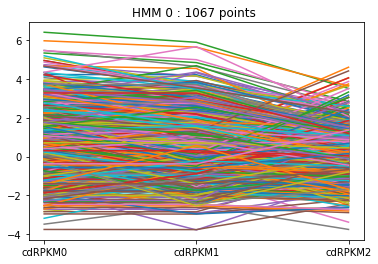

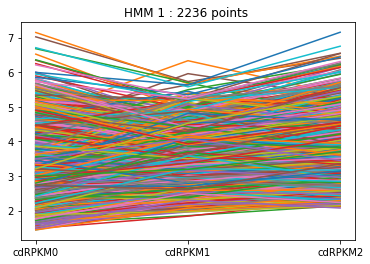

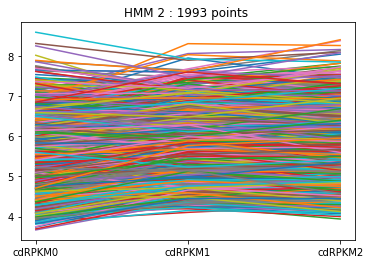

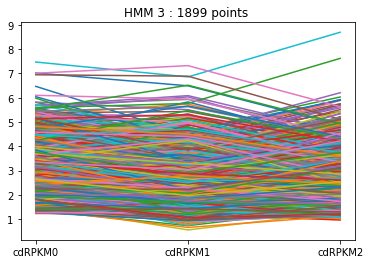

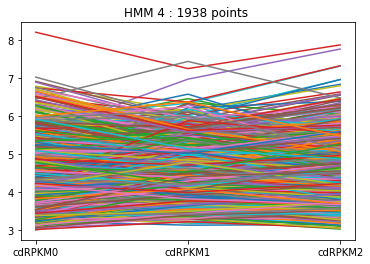

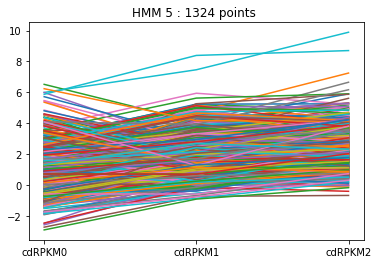

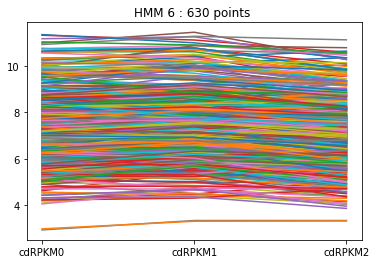

In [56]:
for i in range(0,remodel.n_components):
    plot_cluster(i,Z,X)
    print('\n')

In [57]:
fitted_clusters = []
# Append empty clusters
for i in range(0,remodel.n_components):
    fitted_clusters.append([])
    
for idx, i in enumerate(Z):
    fitted_clusters[Z[idx]].append(list(X[idx]))
    
for i in range(0,3):
    dataframe = pd.DataFrame(np.array(fitted_clusters[i]), columns = list("012"))
    print("Descriptive statistics for cluster", i+1, "is")
    print(dataframe.describe())
    print("*************************************************************************")
    print("*************************************************************************")
    print("*************************************************************************")

Descriptive statistics for cluster 1 is
                 0            1            2
count  1067.000000  1067.000000  1067.000000
mean      0.889110     0.532585     0.353363
std       1.516076     1.525003     1.153926
min      -3.751284    -3.775287    -3.750181
25%      -0.107427    -0.569094    -0.375303
50%       0.974376     0.404954     0.443082
75%       1.826033     1.613145     1.061764
max       6.399520     5.882543     4.599220
*************************************************************************
*************************************************************************
*************************************************************************
Descriptive statistics for cluster 2 is
                 0            1            2
count  2236.000000  2236.000000  2236.000000
mean      3.217326     3.458206     3.677998
std       0.876226     0.668901     0.768980
min       1.441401     1.838556     2.073887
25%       2.627113     2.991005     3.128380
50%       3.101473     

In [58]:
print(BIC(remodel,X))

-45782.7791416


In [23]:
K_values = range(1,10,1)
BIC_scores = []
HMM_models = []
for i in range(1,10):
    model = fit_HMM(i,'full')
    model.fit(X) #get sequence of states using Viterbi
    HMM_models.append(model)
    BIC_scores.append(BIC(model,X))

In [27]:
BIC_scores = []
for i in range(0,9):
    BIC_scores.append(BIC(HMM_models[i],X))

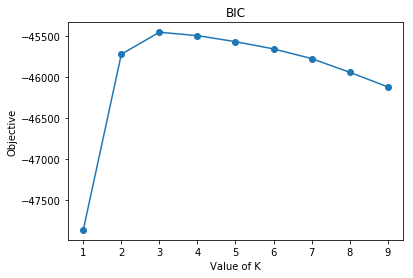

In [28]:
plot_BIC(K_values,BIC_scores)